In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
#Load Dataset
dataset = pd.read_csv('.\Social_Network_Ads.csv')

In [3]:
#View first fiew rows of the dataset
print(dataset.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
#Set X variable
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
#Load library for Training Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

In [6]:
#Load library for scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\Users\100274743\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
#Search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    #append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

In [8]:
#Print Best Score
MSE = [1 - x for x in k_scores]
best_k = k_range[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


In [9]:
#Create Optimal KNN model
classifier = KNeighborsClassifier(n_neighbors = 9)

In [10]:
#Fit KNN Model
classifier.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [11]:
#Prediction
y_pred = classifier.predict(X_test)

In [12]:
#Evaluate the Algorithum
from sklearn.metrics import classification_report, confusion_matrix  
target_names=['Not Buy','Buy']
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred,target_names=target_names)) 

[[46  3]
 [ 5 26]]
             precision    recall  f1-score   support

    Not Buy       0.90      0.94      0.92        49
        Buy       0.90      0.84      0.87        31

avg / total       0.90      0.90      0.90        80



In [13]:
#Let’s try a prediction
Xnew = [[50,84000]]
Xnew = sc.transform(Xnew)
ynew = classifier.predict(Xnew)
print(ynew)

[1]


Text(0,0.5,'Mean Error')

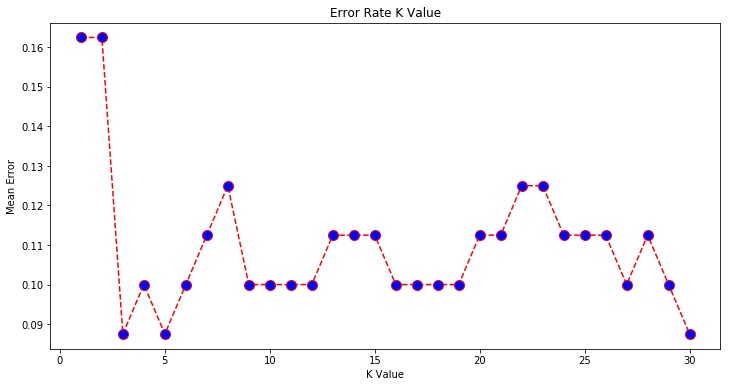

In [14]:
#Alternative Method

error = []
for i in range(1, 31):  
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train, y_train)
    pred_i = knn1.predict(X_test)
    error.append(np.mean(pred_i != y_test))
 
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 31), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')      


classifier2 = KNeighborsClassifier(n_neighbors = 4)

In [15]:
#Create KNN model with 3
classifier2 = KNeighborsClassifier(n_neighbors = 3)

In [16]:
#Fit KNN Model with 3
classifier2.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
#Prediction with 3
y_pred2 = classifier2.predict(X_test)

In [18]:
#Evaluate the Algorithum
from sklearn.metrics import classification_report, confusion_matrix  
target_names=['Not Buy','Buy']
print(confusion_matrix(y_test,y_pred2))  
print(classification_report(y_test,y_pred2,target_names=target_names)) 

[[47  2]
 [ 5 26]]
             precision    recall  f1-score   support

    Not Buy       0.90      0.96      0.93        49
        Buy       0.93      0.84      0.88        31

avg / total       0.91      0.91      0.91        80



In [19]:
#Let’s try a prediction
Xnew2 = [[50,84000]]
Xnew2 = sc.transform(Xnew2)
ynew2 = classifier2.predict(Xnew2)
print(ynew2)

[1]
